# Introduction

Online Education has become a buzzword since the COVID-19 hit the World. Most of the educational institutions went online to continue educational activities while developing countries like Bangladesh took a significant period to ensure online education at every education level. Students of several levels also faced many difficulties when they got introduced to online education. It is important for the decision-makers of educational institutions to be informed about the effectiveness of online education so that they can take further steps to make it more beneficial for the students. 
Our main motivation is to contribute to this matter by analyzing the relevant factors associated with online education. In this work, we have collected students’ information of all three different levels (School, College, and University) by conducting both online and physical surveys. 

# Metadata

The target feature is:
* Adaptivity level

The feature sets are:
* Gender
* Age
* Education Level
* Institution Type
* IT Student
* Location in Town
* Load-shedding
* Financial Condition
* Internet Type
* Network Type
* Class Duration
* Self LMS
* Device

# Install & Load Library

In [ ]:
!pip install dalex
!pip install scikit-plot
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
sns.set(style = 'whitegrid')
import textwrap

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
import xgboost as xgb

from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OrdinalEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
import shap
import dalex as dx

import scikitplot as skplt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Load Dataset

In [ ]:
# Load data from a CSV file into pandas dataFrame
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students_adaptability_level_online_education.csv')

# Data Inspection and Engineering

In [ ]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
1,Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
2,Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
3,Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
4,Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,Girl,16-20,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low
1201,Girl,16-20,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate
1202,Boy,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate
1203,Girl,16-20,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Gender               1205 non-null   object
 1   Age                  1205 non-null   object
 2   Education Level      1205 non-null   object
 3   Institution Type     1205 non-null   object
 4   IT Student           1205 non-null   object
 5   Location             1205 non-null   object
 6   Load-shedding        1205 non-null   object
 7   Financial Condition  1205 non-null   object
 8   Internet Type        1205 non-null   object
 9   Network Type         1205 non-null   object
 10  Class Duration       1205 non-null   object
 11  Self Lms             1205 non-null   object
 12  Device               1205 non-null   object
 13  Adaptivity Level     1205 non-null   object
dtypes: object(14)
memory usage: 131.9+ KB


The Target Distribution

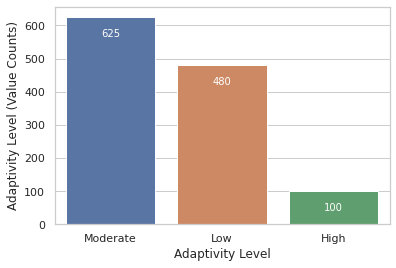

In [ ]:
ax = sns.countplot(x="Adaptivity Level", data=data)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='white')

plt.xticks(rotation=0, horizontalalignment="center")
plt.xlabel("Adaptivity Level", fontsize=12)
plt.ylabel("Adaptivity Level (Value Counts)", fontsize=12);

We can observe there imbalance case in our dataset. We can solve this in two ways:

- Post-modeling, by changing classification threhold to optimize metrics such as F1-Score, precision, recall, etc
- Pre-modeling, by doing resamping such as oversampling, downsampling, and mixed sampling

We gonna do pre-modelling oversampling if necessary

Next we gonna check numerical data distribution and multicolinearity for each variables


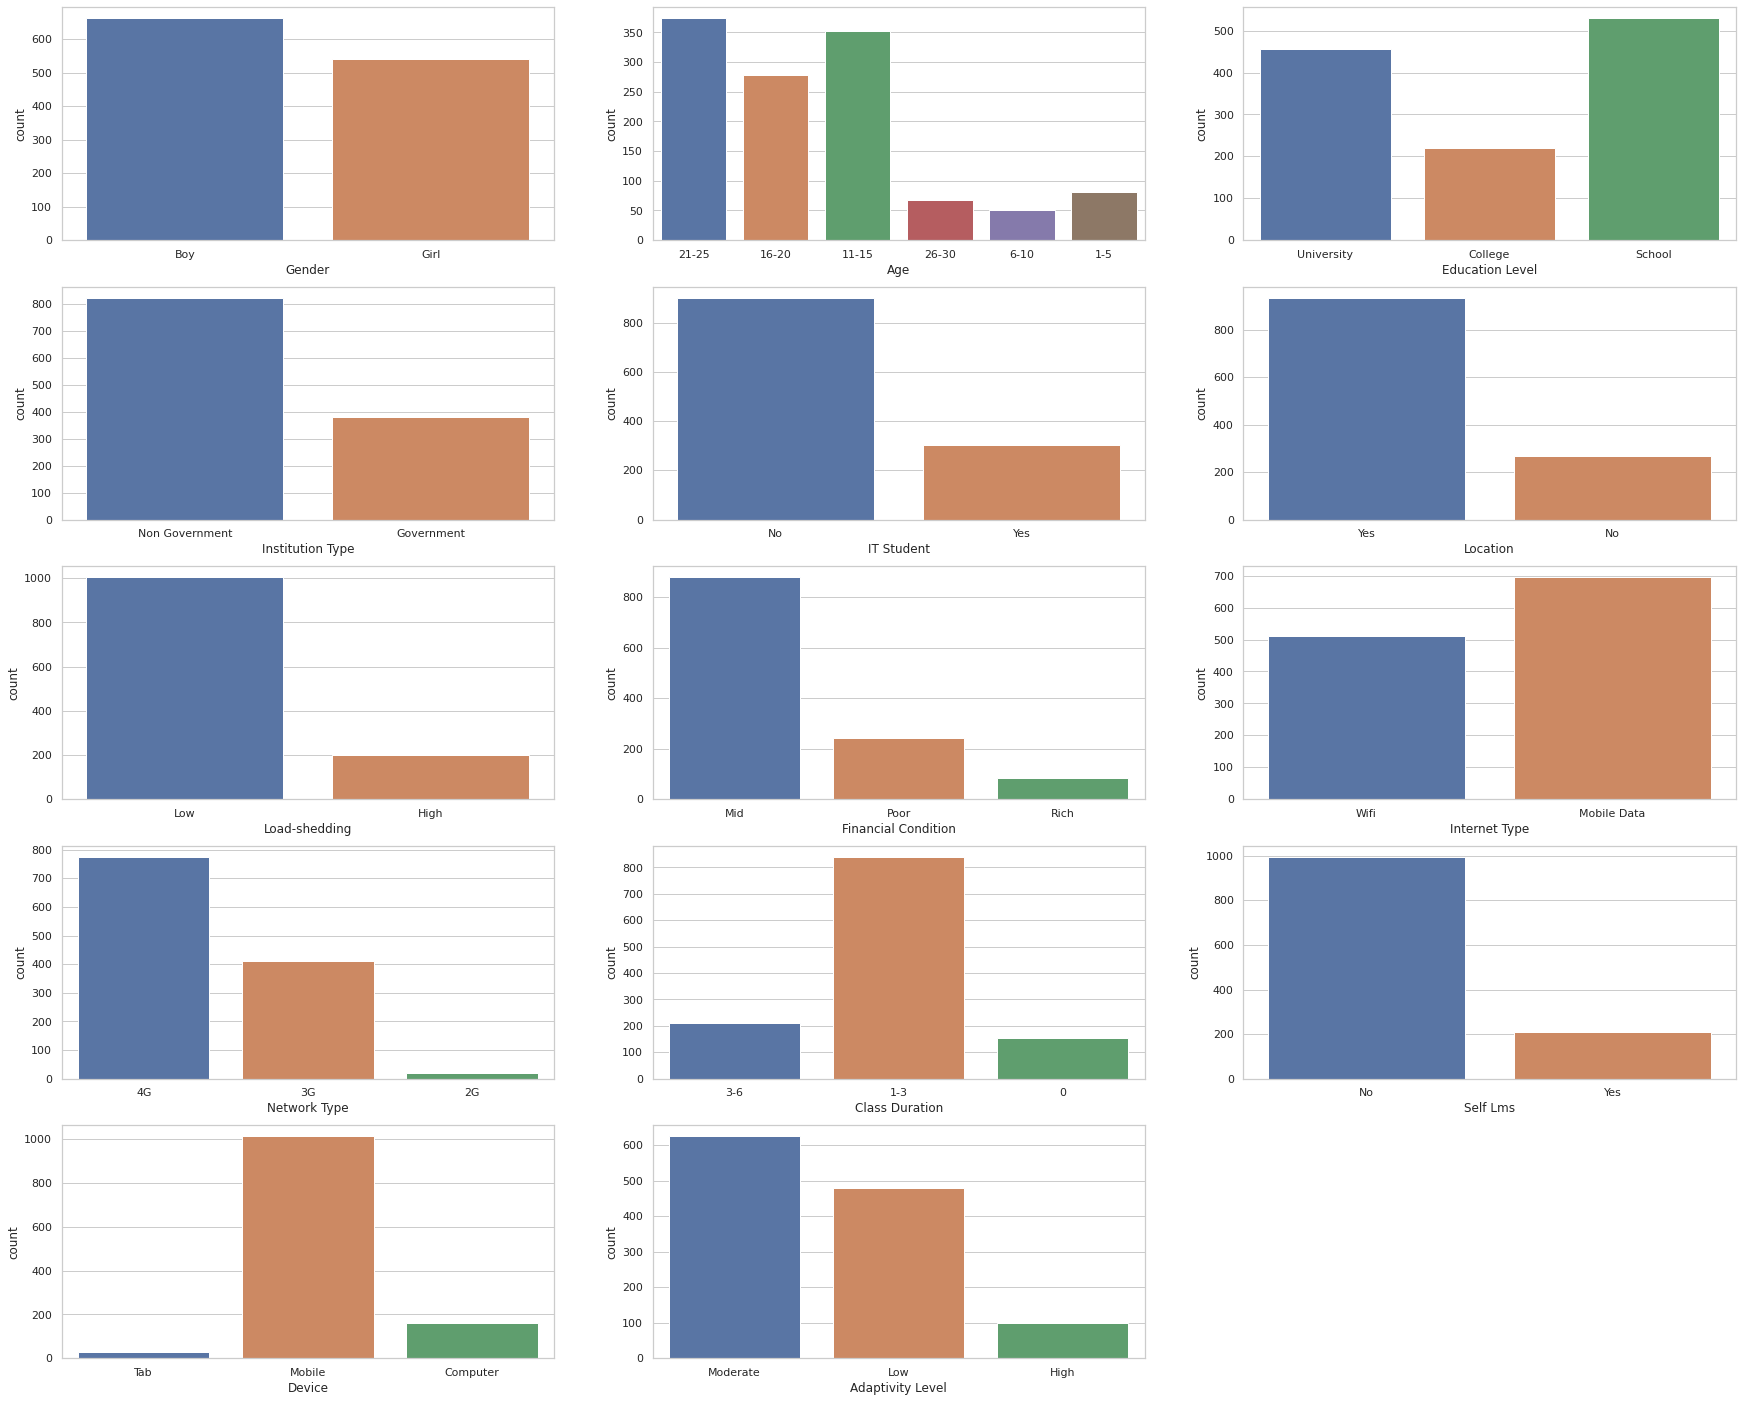

In [ ]:
i = 1
plt.figure(figsize = (30,30))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature ,  data = data)
    i +=1

Conclusions from the presented graphs:

* Variable study Gender is balanced, applied to the same number of men and women to obtain a relevant result.
* Most of the subjects correspond to the age of 11–25 years, this is the age when we can confidently talk about sustainable adaptation to learning.
* Values ​​are contributed by the level of education indicates that most of the subjects have only a school education. These data correlate with a certain schedule, where most of the subjects are in the age range from 7 to 20 years. Existing education services are provided by non-private institutions. This is due to the development of the education market.
* It should also be noted that most of the commercials are sold on the phone through the 4G network, which shows that people get education in any place convenient for them.
* It should be noted that some of the online courses are not assimilated by students.



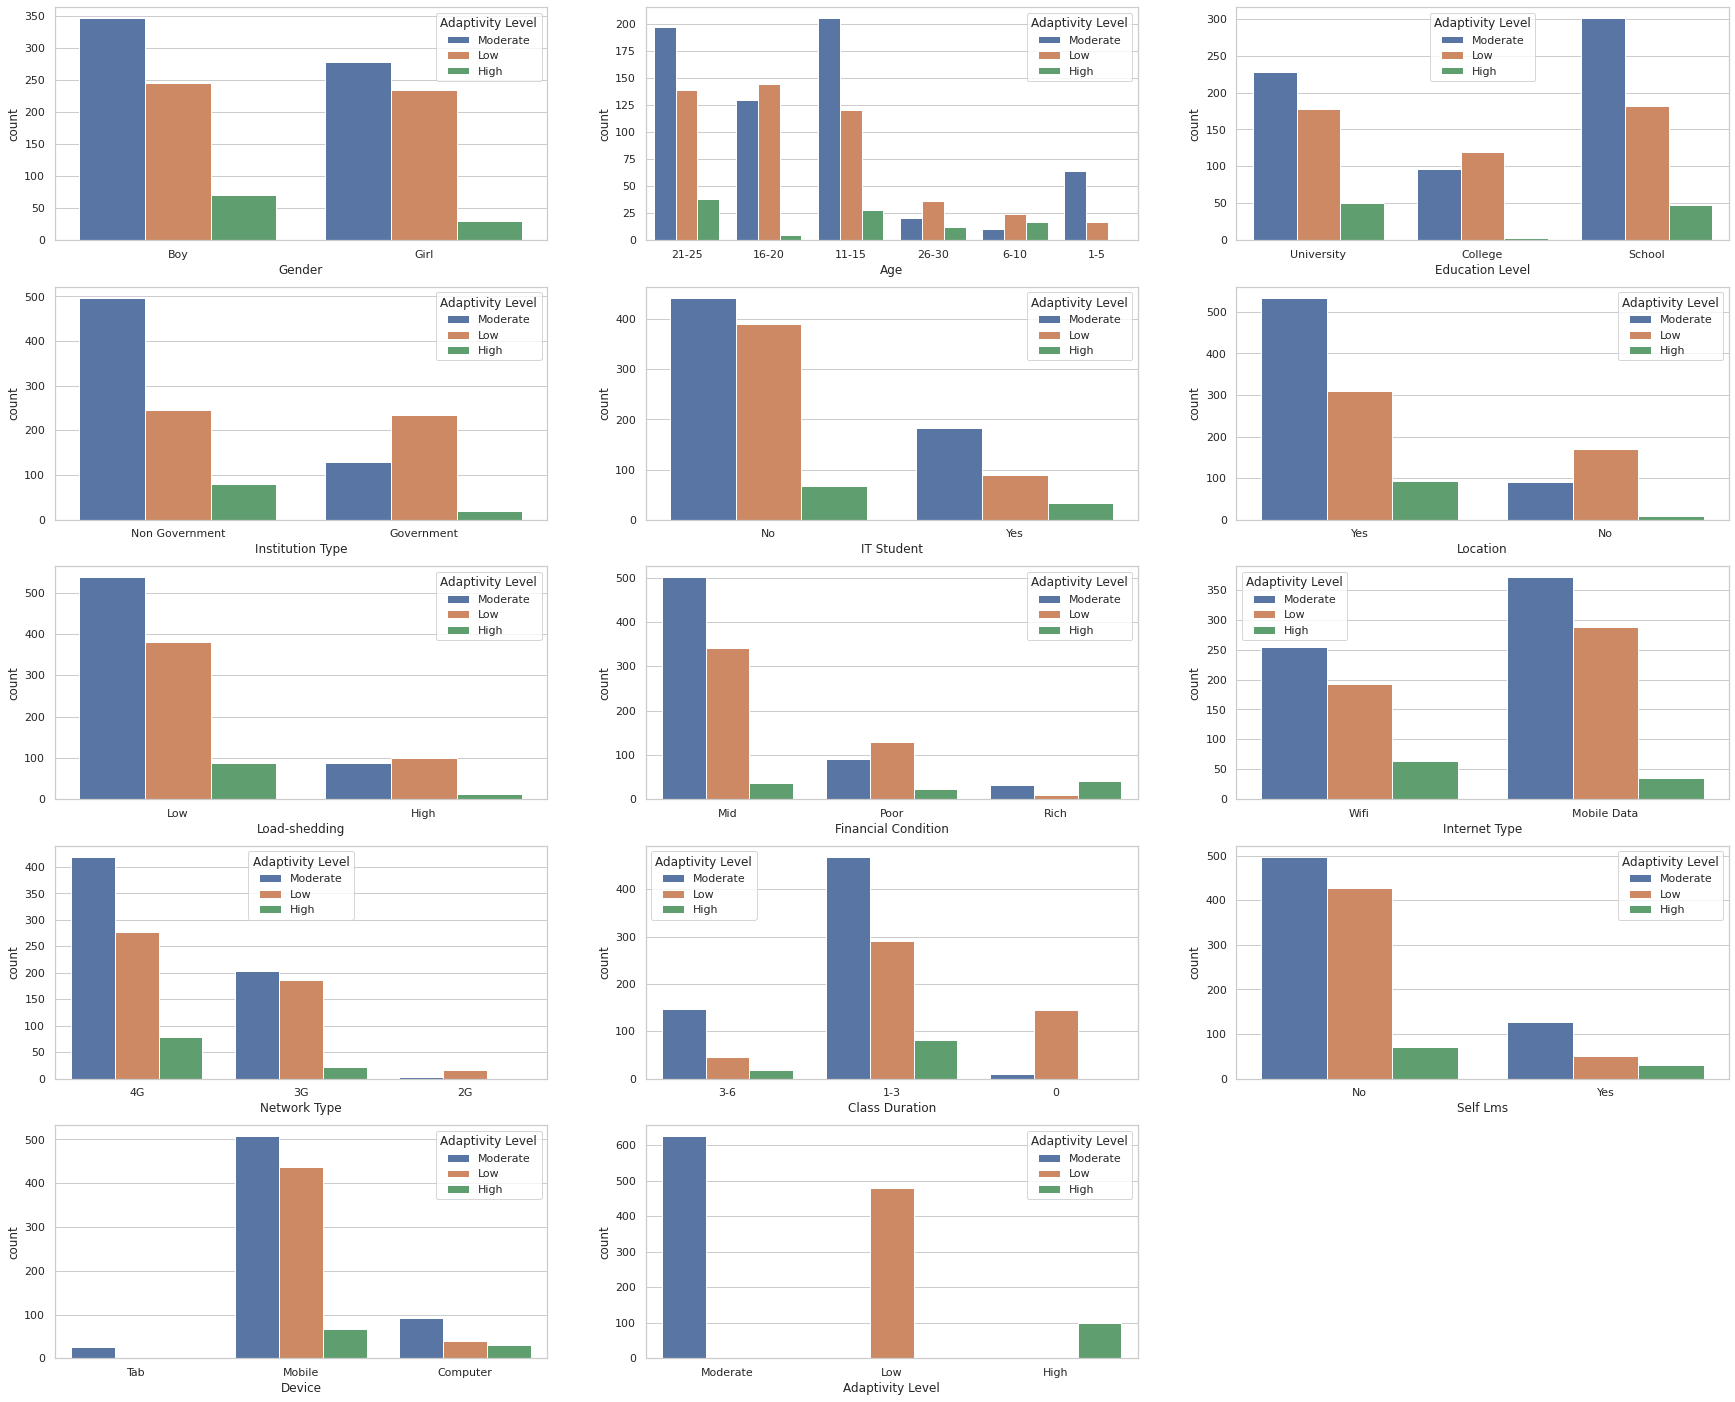

In [ ]:
i = 1
plt.figure(figsize = (30,30))
for feature in data:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , hue='Adaptivity Level', data = data)
    i +=1

Conclusions from the obtained distributions:

* Men are easier to adapt to new knowledge, the level of poor adaptation between men and women is approximately the same.
* The best adaptation is shown at the age of 21-25, and 11-15, the worst - after 26 years and in the interval from 16 to 20 years. Worse adaptation to new knowledge can be explained by social and physiological factors.
* It should also be noted that the best digestibility of the material is observed in the middle class. We can talk about this phenomenon for a very long time :)
* High adaptation to the material is also noted among urban residents, this is due to social and economic factors.
* The level of adaptation to new knowledge also depends on the quality of the Internet.


In [ ]:
data.isnull().sum()

Gender                 0
Age                    0
Education Level        0
Institution Type       0
IT Student             0
Location               0
Load-shedding          0
Financial Condition    0
Internet Type          0
Network Type           0
Class Duration         0
Self Lms               0
Device                 0
Adaptivity Level       0
dtype: int64

In [ ]:
# Encoding The Data
scaler = OrdinalEncoder()
names = data.columns
d = scaler.fit_transform(data)

data = pd.DataFrame(d, columns=names)

In [ ]:
data

,Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
0,0.0,3.0,2.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,0.0,2.0,2.0
1,1.0,3.0,2.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0,1.0,1.0,1.0,2.0
2,1.0,2.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,2.0
3,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,2.0,1.0,0.0,1.0,2.0
4,1.0,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,1.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0
1201,1.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,1.0,2.0
1202,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,2.0
1203,1.0,2.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,1.0


# Train-Test Split Data

Due to the insufficient amount of data, we tried to balance the dataset by increasing the size of the rare sample using oversampling with the SMOTE method.

In [ ]:
oversample = SMOTE()
features, labels=  oversample.fit_resample(data.drop(["Adaptivity Level"],axis=1),data["Adaptivity Level"])

In [ ]:
X = data.drop(["Adaptivity Level"], axis = 1)
y = data["Adaptivity Level"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y, 
    test_size=0.2,
    stratify = y, 
    random_state=42
)

# Data Exploration

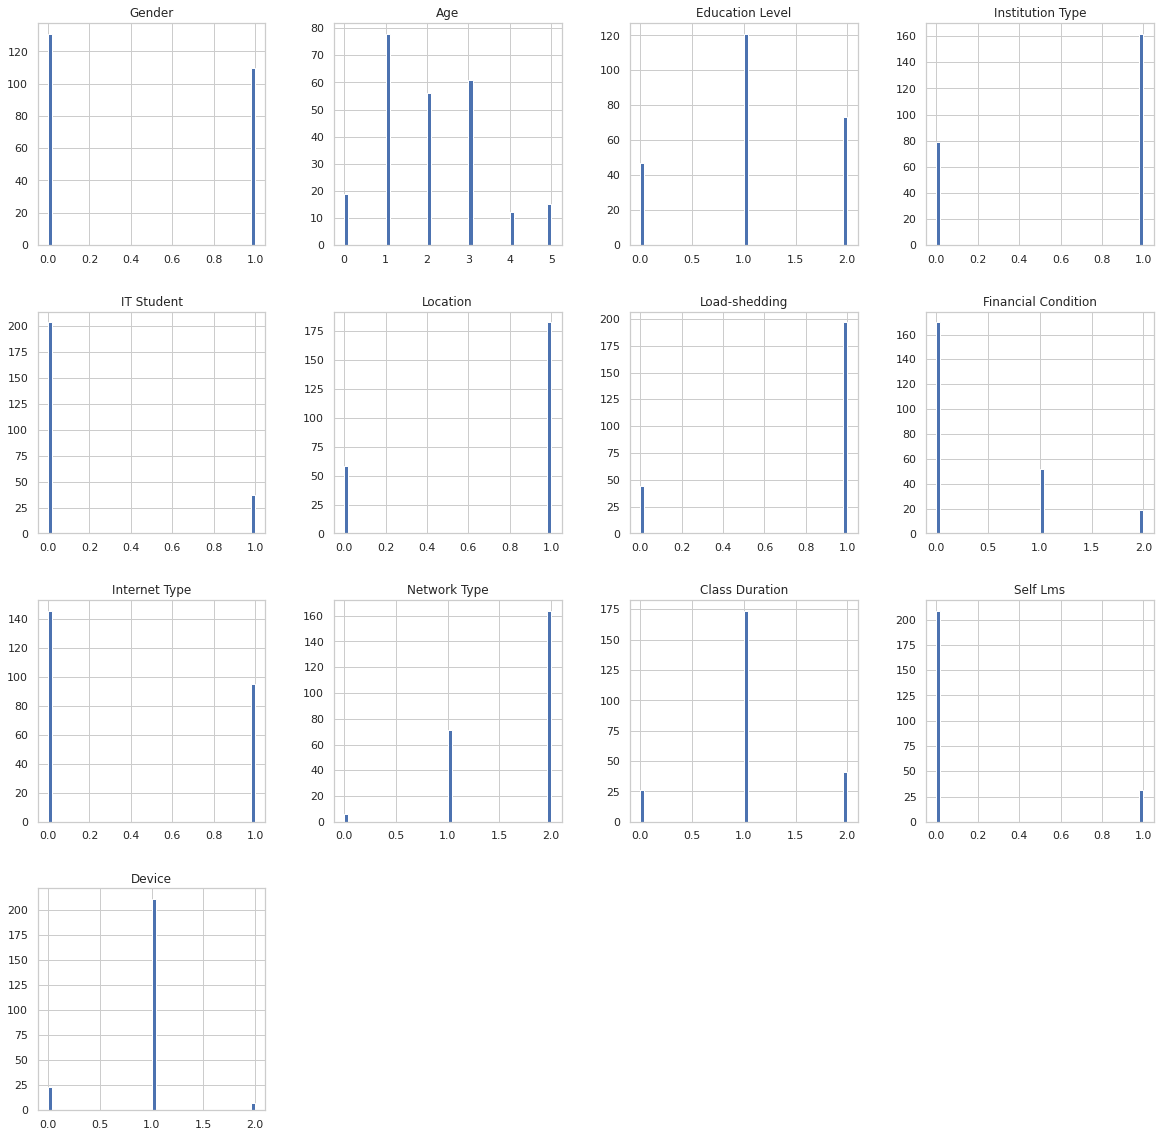

In [ ]:
# check numerical data distribution
X_test.hist(bins=50, figsize = (20, 20));

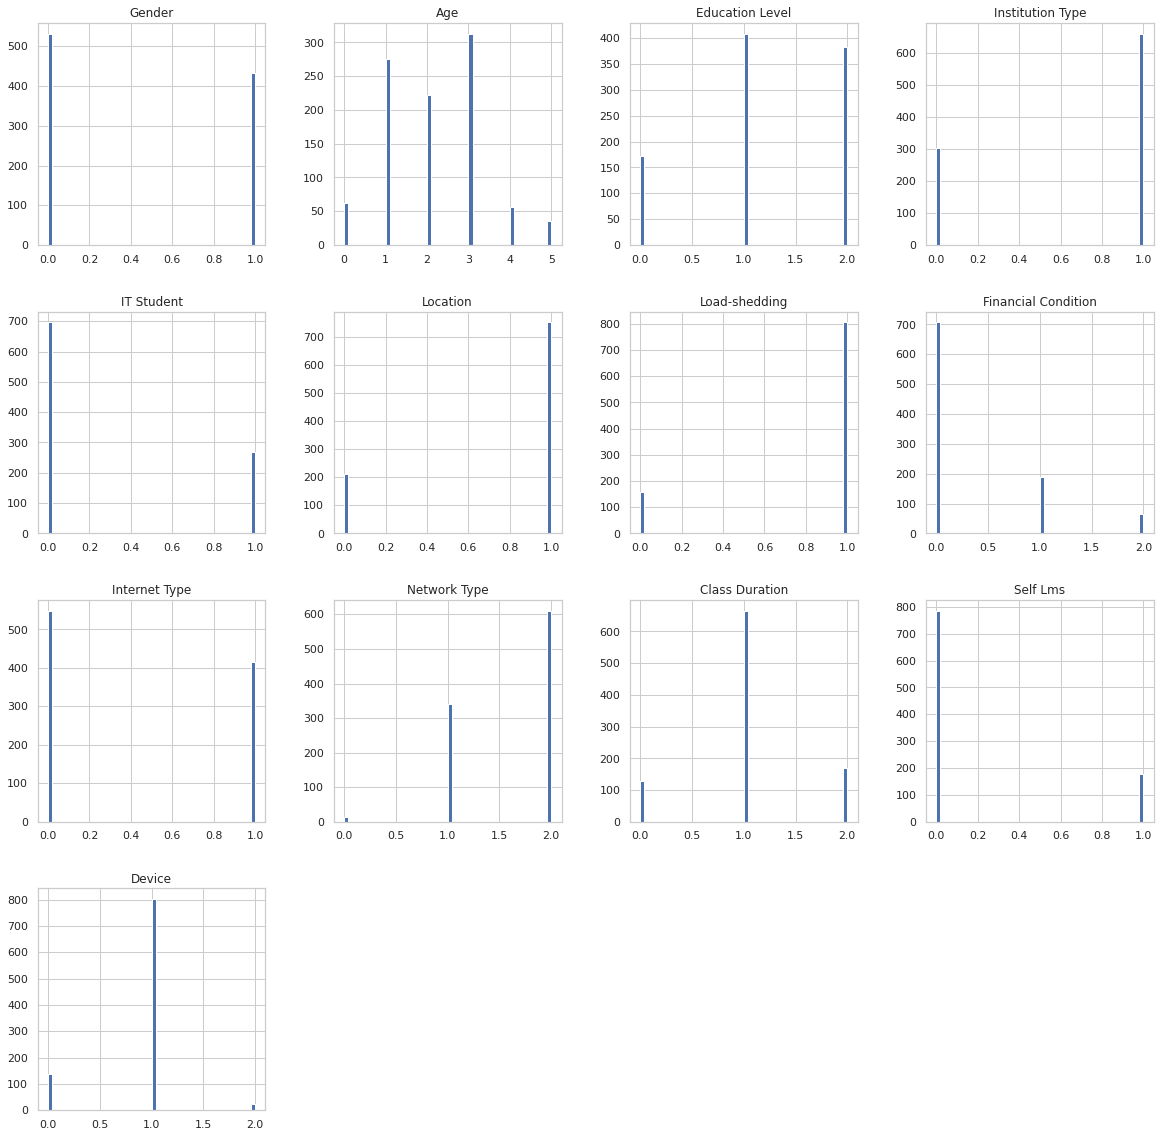

In [ ]:
# check numerical data distribution
X_train.hist(bins=50, figsize = (20, 20));

In this data, there is all data are categorical type.

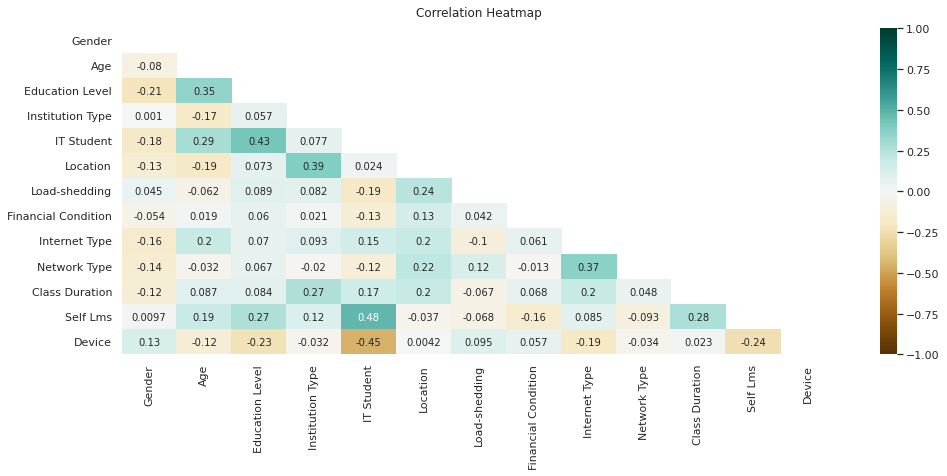

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(X_test.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_test.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

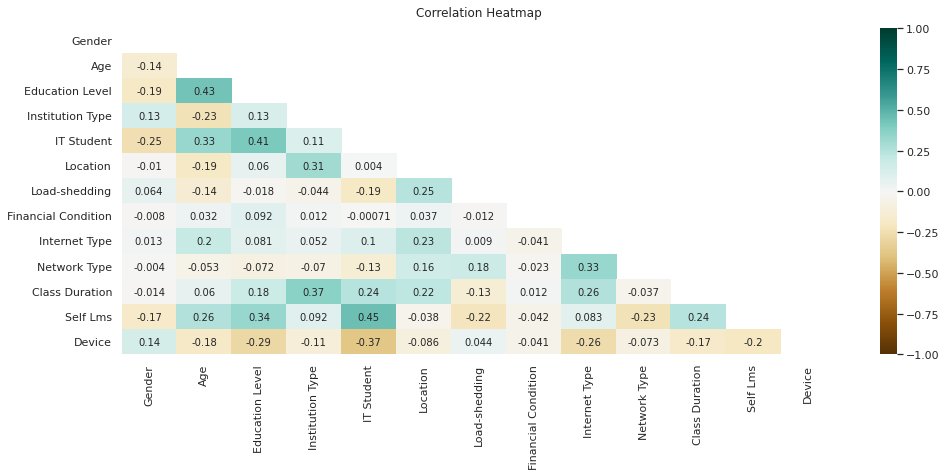

In [ ]:
# Increase the size of the heatmap
plt.figure(figsize=(16, 6))

# Set the range of values to be displayed on the colormap from -1 to 1, and set the annotation to True to display the correlation values on the heatmap
mask = np.triu(np.ones_like(X_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(X_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

# Give a title to the heatmap. Pad defines the distance of the title from the top of the heatmap
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

There is biggest correlation between self-LMS - IT student (45%) and IT student - device (-37%).

# Modeling

## Define Model

We will use 5 models:

- KNN as a baseline model
- Decision tree
- Random Forest
- SVM RBF
- XGBoost


**KNN**

In [ ]:
knn_clf = KNeighborsClassifier(
    n_neighbors = 5
)

**Decision Tree**

In [ ]:
dc_clf = DecisionTreeClassifier(
    max_depth = 5,
    ccp_alpha = 0.001
)

**Random Forest**

In [ ]:
rf_clf = RandomForestClassifier(
    random_state=1000,
    n_estimators=1000
)

**SVM RBF**

In [ ]:
svm_clf = SVC(
    random_state = 1000,
    probability=True
)

**XGBoost**

In [ ]:
xgb_clf = XGBClassifier(
    random_state=1000,
    n_estimators=1000
)

## Fitting Model to Data

**KNN**

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

**Decision Tree**

In [ ]:
dc_clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=5)

**Random Forest**

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, random_state=1000)

**SVM RBF**

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=1000)

**XGBoost**

In [ ]:
xgb_clf.fit(X_train, y_train)

XGBClassifier(n_estimators=1000, objective='multi:softprob', random_state=1000)

## Model Evaluation

In [ ]:
# knn prediction
knn_pred = knn_clf.predict(X_test)
knn_pred_proba = knn_clf.predict_proba(X_test)

# decision tree prediction
dc_pred = dc_clf.predict(X_test)
dc_pred_proba = dc_clf.predict_proba(X_test)

# random forest prediction
rf_pred = rf_clf.predict(X_test)
rf_pred_proba = rf_clf.predict_proba(X_test)

# SVM RBF prediction
svm_pred = svm_clf.predict(X_test)
svm_pred_proba = svm_clf.predict_proba(X_test)

# XGBoost prediction
xgb_pred = xgb_clf.predict(X_test)
xgb_pred_proba = xgb_clf.predict_proba(X_test)

**KNN Evaluation**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, knn_pred, target_names=["High","Low","Moderate"], output_dict=True))

,High,Low,Moderate,accuracy,macro avg,weighted avg
precision,0.666667,0.773196,0.785714,0.771784,0.741859,0.770848
recall,0.600000,0.781250,0.792000,0.771784,0.724417,0.771784
f1-score,0.631579,0.777202,0.788845,0.771784,0.732542,0.771156
support,20.000000,96.000000,125.000000,0.771784,241.000000,241.000000


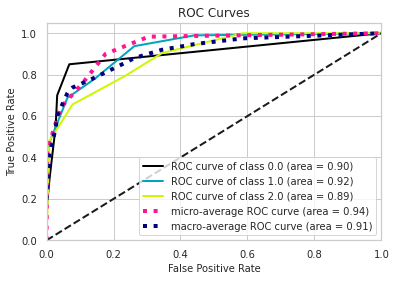

In [ ]:
skplt.metrics.plot_roc_curve(y_test, knn_pred_proba);

**Decision Tree**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, dc_pred, target_names=["High","Low","Moderate"], output_dict=True))

,High,Low,Moderate,accuracy,macro avg,weighted avg
precision,0.538462,0.702381,0.680556,0.680498,0.640466,0.677457
recall,0.350000,0.614583,0.784000,0.680498,0.582861,0.680498
f1-score,0.424242,0.655556,0.728625,0.680498,0.602808,0.674258
support,20.000000,96.000000,125.000000,0.680498,241.000000,241.000000


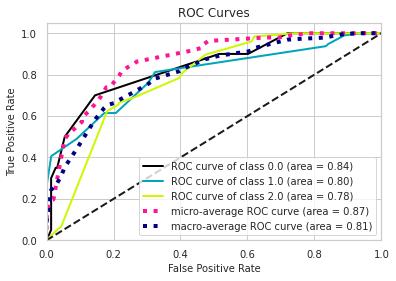

In [ ]:
skplt.metrics.plot_roc_curve(y_test, dc_pred_proba);

**SVM RBF**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, svm_pred, target_names=["High","Low","Moderate"], output_dict=True))

,High,Low,Moderate,accuracy,macro avg,weighted avg
precision,0.666667,0.784810,0.713333,0.73444,0.721603,0.737933
recall,0.400000,0.645833,0.856000,0.73444,0.633944,0.734440
f1-score,0.500000,0.708571,0.778182,0.73444,0.662251,0.727368
support,20.000000,96.000000,125.000000,0.73444,241.000000,241.000000


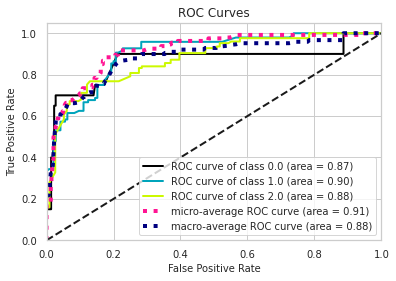

In [ ]:
skplt.metrics.plot_roc_curve(y_test, svm_pred_proba);

**XGBoost**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, xgb_pred, target_names=["High","Low","Moderate"], output_dict=True))

,High,Low,Moderate,accuracy,macro avg,weighted avg
precision,0.937500,0.855670,0.875000,0.871369,0.889390,0.872487
recall,0.750000,0.864583,0.896000,0.871369,0.836861,0.871369
f1-score,0.833333,0.860104,0.885375,0.871369,0.859604,0.870990
support,20.000000,96.000000,125.000000,0.871369,241.000000,241.000000


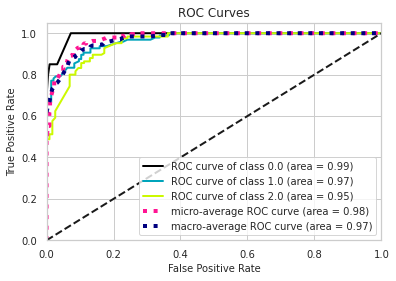

In [ ]:
skplt.metrics.plot_roc_curve(y_test, xgb_pred_proba);

**Random Forest**

In [ ]:
pd.DataFrame(metrics.classification_report(y_test, rf_pred, target_names=["High","Low","Moderate"], output_dict=True))

,High,Low,Moderate,accuracy,macro avg,weighted avg
precision,0.894737,0.925532,0.914062,0.917012,0.911444,0.917027
recall,0.850000,0.906250,0.936000,0.917012,0.897417,0.917012
f1-score,0.871795,0.915789,0.924901,0.917012,0.904162,0.916864
support,20.000000,96.000000,125.000000,0.917012,241.000000,241.000000


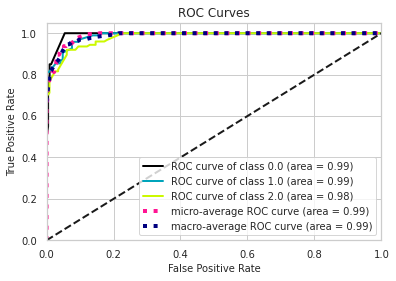

In [ ]:
skplt.metrics.plot_roc_curve(y_test, rf_pred_proba);

From the ROC curve above, we can conclude that our model provides an excellent performance with an AUC (Area Under the Curve) value of 0.99 (close to 1). The ability of the model that we make is stated with a value of 0.99 which means that the model we create has 9% of the area under the curve.


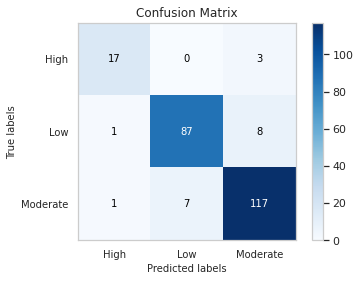

In [ ]:
# random forest result
ax = skplt.metrics.plot_confusion_matrix(y_test, rf_pred)

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(["High","Low","Moderate"]); ax.yaxis.set_ticklabels(["High","Low","Moderate"]);

From the matrix we can analyze that:
- 17 records of High Adaptivity were predicted correctly by the model and 5 records of High Adaptivity were wrongly predicted by Random Forest model.
- 87 records of Low Adaptivity were predicted correctly by the model and 16 records of Low Adaptivity were wrongly predicted by Random Forest model.
- 117 records of Moderate Adaptivity were predicted correctly by the model and 19 records of Moderate Adaptivity were wrongly predicted by Random Forest model.

On the 5 models above, the metrics used to evaluate the best model include:
1. F1-Score on Accuracy
2. F1-Score on High, Moderate and Low Adaptivity
3. Macro-Avg ROC Curve

From the matrix, we can conclude that **Random Forest** is the best model because it has higher F1 Score on Accuracy, on Existing, and ROC Curve. The details are:
1. F1-Score on Accuracy = 92%
2. F1-Score on High, Moderate and Low Adaptivity = 92%
3. Macro-Avg ROC Curve = 92%

And the other side, we can observe that the better the value of F1 Score, the better the value of ROC Curve.

# Model Agnostic Methods

In [ ]:
# Inititate Explainer for all models

## initiate explainer for Random Forest model
churn_rf_exp = dx.Explainer(rf_clf, X_train, y_train, label = "Random Forest Interpretation")

Preparation of a new explainer is initiated

  -> data              : 964 rows 13 cols
  -> target variable   : Parameter 'y' was a pandas.Series. Converted to a numpy.ndarray.
  -> target variable   : 964 values
  -> model_class       : sklearn.ensemble._forest.RandomForestClassifier (default)
  -> label             : Random Forest Interpretation
  -> predict function  : <function yhat_proba_default at 0x7f74965488c0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.398, max = 1.0
  -> model type        : classification will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -0.497, mean = 1.04, max = 2.0
  -> model_info        : package sklearn

A new explainer has been created!


## Feature Importance

In [ ]:
# visualizr permutation feature importance for Random Forest Model
churn_rf_exp.model_parts().plot()

Feature importance values indicate which fields had the biggest impact on each prediction that is generated by classification.

The five biggest impact variables in Feature Importance: ***Class Duration, Gender, Institution Type, Age and Education Level.***

## Partial Dependence Plot

In [ ]:
# create partial dependence plot of Random Forest model
churn_rf_exp.model_profile().plot()

Calculating ceteris paribus: 100%|██████████| 13/13 [00:33<00:00,  2.58s/it]


In general, the chart on the PDP shows the same pattern. This is because the categorical data types make the graph difficult to explain in detail.

## SHAP Decision

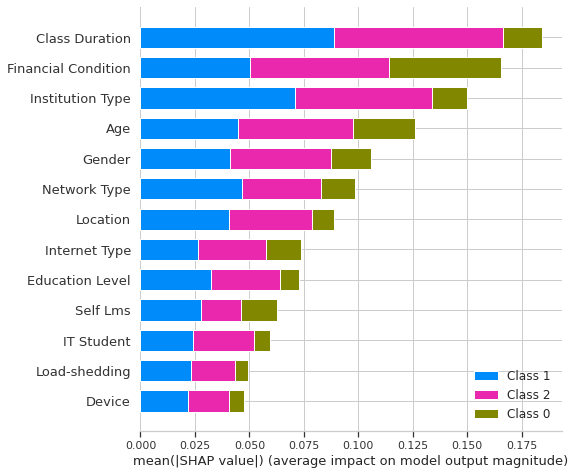

In [ ]:
# create SHAP Tree Explainer for random forest model with first 1000 rows of train data
rf_shap_values = shap.TreeExplainer(rf_clf).shap_values(X_test[:1000])

# create SHAP summary plot with next 1000 rows of train data
ax = shap.summary_plot(rf_shap_values, X_test[1001:2000], plot_type='bar')

The SHAP (SHapley Additive exPlanations) framework has proved to be an important advancement in the field of machine learning model interpretation.

The five biggest impact variables in SHAP Decision: ***Class Duration, Financial Condition, Institution Type, Age and Network Type.***

# Conclusion and Recommendation

In this data, we conclude that:
1. The best ML model to predict Adaptivity Level is Random Forest as it is a highly precise classification model shown by the metrics scoring with 92% accuracy.
2. The distribution of target variable in Adaptivity Level is highly dominated by Moderate Adaptivity.
3. Statement above enhanced by the feature importance plot is Class Duration, Gender, Institution Type, Age and Education Level.
4. Statement above enhanced by the feature importance plot is Class Duration, Gender, Institution Type, Age and Education Level.
5. Statement above enhanced by the SHAP decision plot is Class Duration, Financial Condition, Institution Type, Age and Network Type.
6. The highest factors influence the level of student adaptation to online education activities is class duration with optimization study in 1-3 hours.